In [1]:
import matplotlib.pyplot as plt
import pandas as pd


def add_labels(x_list, y_list, labels):
    for x, y, label in zip(x_list,y_list, labels):
        plt.text(x+0.25,y+0.25,label)

notes = pd.read_csv("data/notes.txt",sep='\s+')
notes

,math,scie,fran,lati,d-m
jean,6.0,6.0,5.0,5.5,8
alin,8.0,8.0,8.0,8.0,9
anni,6.0,7.0,11.0,9.5,11
moni,14.5,14.5,15.5,15.0,8
didi,14.0,14.0,12.0,12.5,10
andr,11.0,10.0,5.5,7.0,13
pier,5.5,7.0,14.0,11.5,10
brig,13.0,12.5,8.5,9.5,12
evel,9.0,9.5,12.5,12.0,18


Charger le jeu de données présent dans le fichier data/notes.txt. Visualiser la dispersion des notes. On pourra utiliser la fonction fournie add_labels pour ajouter les étiquettes.

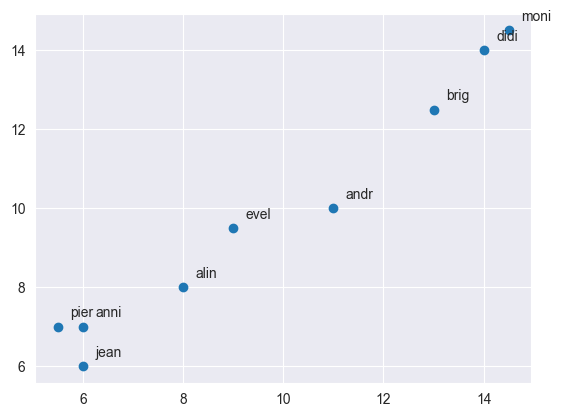

In [2]:
plt.scatter(notes.math,notes.scie)
add_labels(notes.math,notes.scie,notes.index)

Faire une brève analyse des données ; en particulier :
## 1. comment sont réparties les notes, dans chaque matière ?

<Axes: xlabel='variable', ylabel='value'>

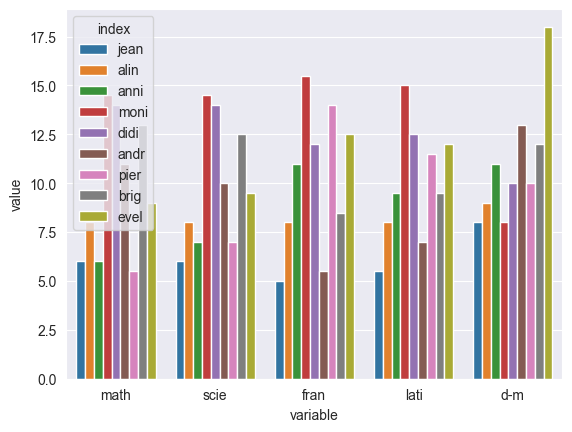

In [3]:
import seaborn as sns
notes0=notes.reset_index()
# notes0
notes_melt=notes0.melt(id_vars=["index"])
# notes_melt
# sns.barplot(data=notes_melt,x="index",y="value",hue="variable")
sns.barplot(data=notes_melt,x="variable",y="value",hue="index")

## 2. Peut-on rapprocher certaines matières les unes des autres ?

<Axes: >

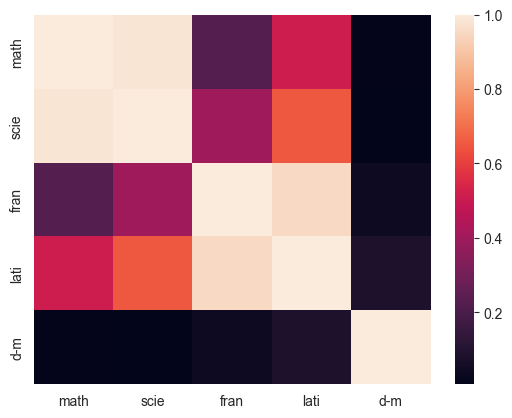

In [4]:
corr = notes.corr()
sns.heatmap(corr)

## 3. On cherche à identifier des groupes d’élèves en fonction des résultats scolaires.
### 3.1 Représenter les élèves en fonction de leurs résultats dans les matières scientifiques ; quels sont les groupes d’individus qui semblent se détacher ?

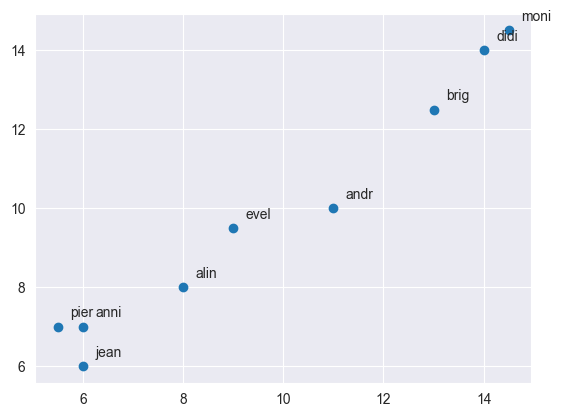

In [5]:
plt.scatter(notes.math, notes.scie)
add_labels(notes.math, notes.scie, notes.index)

### 3.2 Faire de même avec les matières littéraires, puis avec les arts.

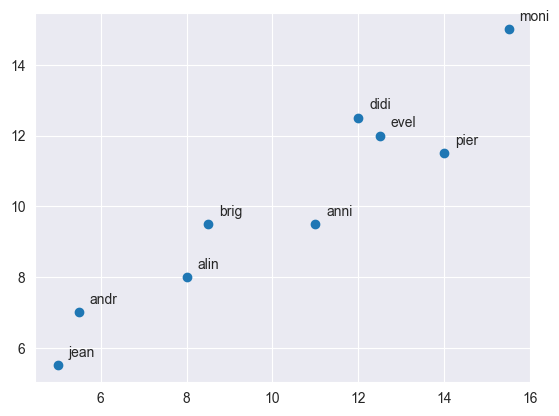

In [6]:
plt.scatter(notes.fran, notes.lati)
add_labels(notes.fran, notes.lati, notes.index)

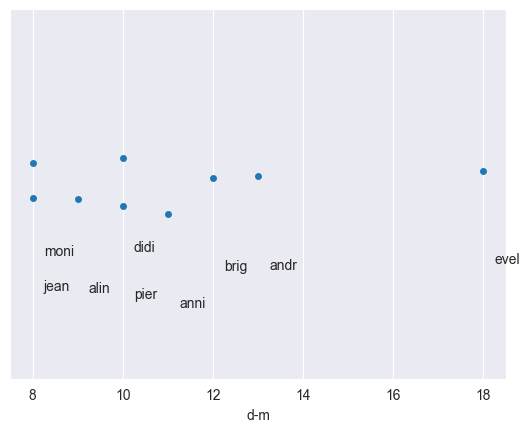

In [7]:
ax = sns.stripplot(x=notes["d-m"])
loc = ax.get_children()[0].get_offsets().data
add_labels(*loc.T, notes.index)

## 4. Représenter les élèves par deux informations : leur moyenne dans les matières scientifiques, et leur moyenne dans les matières littéraires. Interpréter les résultats obtenus.
粗略地说，第一象限：理科好，文科好，第二象限：文科好，理科不好，第三象限：理科好，文科不好，第四象限：理科好，文科不好。

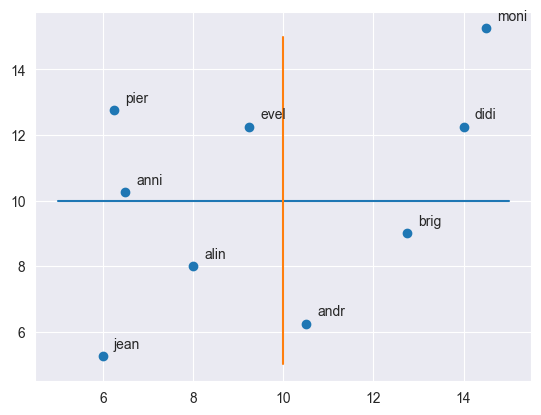

In [8]:
plt.scatter((notes.scie+notes.math)/2, (notes.fran+notes.lati)/2)
add_labels((notes.scie+notes.math)/2, (notes.fran+notes.lati)/2, notes.index)
plt.plot([5,15],[10,10])
plt.plot([10,10],[5,15])

# Projection et qualité de représentation
$$
 A_1=\begin{bmatrix}
   1/2 & 0 & 1/2 & 0 & 0 \\
   1/2 & 0 & -1/2 & 0 & 0 \\
   0 & 1/2 & 0 & 1/2 & 0 \\
   0 & 1/2 & 0 & -1/2 & 0 \\
   0 & 0 & 0 & 0 & 1
  \end{bmatrix}
$$
## 5.1 Définit-elle une base ?
Elle définit une base orthogonale mais pas orthonormale : les vecteurs la composant ne sont pas normés
## 5.2 Comment exprimer les notes du tableau $X$ dans la nouvelle base $A_1$, et comment revenir dans la base canonique de $R^5$
$A_1 (X_{A_1})^T=X^T$.
## 5.3 Comment peut-on interpréter les coordonnées des individus exprimées dans cette nouvelle base ? Que permet de visualiser la représentation selon les composantes $(X^1,X^2)$ ou $(X^1,X^3)$
第一列就是理科，第二列就文科，第三列math好但是sci差，第四列fran好但lati差，第五列就d-m好


 ## 6. On considère à présent la matrice $B_1$ suivante :
 $$
 B_1=\begin{bmatrix}
   \sqrt2/2 & 0 & \sqrt2/2 & 0 & 0 \\
   \sqrt2/2 & 0 & -\sqrt2/2 & 0 & 0 \\
   0 & \sqrt2/2 & 0 & \sqrt2/2 & 0 \\
   0 & \sqrt2/2 & 0 & -\sqrt2/2 & 0 \\
   0 & 0 & 0 & 0 & 1
  \end{bmatrix}
$$
## 6.1 Définit-elle une base ?
La matrice $B_1$ correspond évidemment à la matrice $A_1$ après normalisation des vecteurs la composant. Elle définit donc une base orthonormée.
## 6.2 Quelles sont les coordonnées des individus de X dans la nouvelle base B1 ? Comment peut-on interpréter les coordonnées des individus exprimés dans cette nouvelle base ? Que permet de visualiser la représentation selon les composante $(X^1,X^2)$ ou $(X^1,X^3)$
已知$B_1 (X_{B_1})^T=X^T$, 由于orthogonale, 所以$B_1^{-1}=B_1^T$, 可得$X_{B_1}=X B_1$.
解释与上一题相同，只是数据点之间的距离变化了


# Choix d’une représentation
On définit la qualité de la représentation selon un axe comme étant la quantité d’inertie expliquée par cet axe
## 8. Quelle est la quantité d’inertie du nuage de points expliquée par chacun des axes, si l’on considère la base canonique de $R^5$, Quelle est la quantité d’inertie totale du nuage de points ? On pourra utiliser np.cov avec les bons arguments.

In [12]:
import numpy as np
Xc= notes[['math','scie','fran','lati','d-m']].to_numpy()
C = np.cov(Xc,bias=True,rowvar=False)
np.diag(C).sum()
C

array([[11.38888889,  9.91666667,  2.65740741,  4.82407407,  0.11111111],
       [ 9.91666667,  8.94444444,  4.12037037,  5.48148148,  0.05555556],
       [ 2.65740741,  4.12037037, 12.0617284 ,  9.29320988,  0.38888889],
       [ 4.82407407,  5.48148148,  9.29320988,  7.91358025,  0.66666667],
       [ 0.11111111,  0.05555556,  0.38888889,  0.66666667,  8.66666667]])

In [10]:
import numpy.linalg as linalg
A1 = np.array([[0.5, 0, 0.5, 0, 0],
              [0.5, 0 , -0.5, 0, 0],
              [0, 0.5, 0, 0.5, 0],
              [0, 0.5, 0, -0.5, 0],
              [0, 0, 0, 0, 1]])
C1 = np.cov(Xc @ linalg.inv(A1).T,bias=True,rowvar=False)
np.diag(C1).sum()

89.28395061728395

In [11]:
B1 = np.array([[np.sqrt(2)/2, 0, np.sqrt(2)/2, 0, 0],
               [np.sqrt(2)/2, 0 , -np.sqrt(2)/2, 0, 0],
               [0, np.sqrt(2)/2, 0, np.sqrt(2)/2, 0],
               [0, np.sqrt(2)/2, 0, -np.sqrt(2)/2, 0],
               [0, 0, 0, 0, 1]])